__Построение деревьев решений__

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from dtreeplt import dtreeplt

Загружаем данные, полученные в предыдущем шаге работы

In [3]:
data = pd.read_csv('..\data\expr_matrix.txt', sep="\t")

Так как количество образцов очень мало по сравнению с количеством признаков я не стала делить выборку на обучающие и тестирующие части, чтобы еще сильнее не уменьшать количество данных.

In [4]:
classes = data[["Group"]]
data = data.drop(columns="Group")

In [5]:
clf = DecisionTreeClassifier(max_depth=2)

In [6]:
control_vs_low_dose = clf.fit(data.iloc[0:12], classes[0:12])

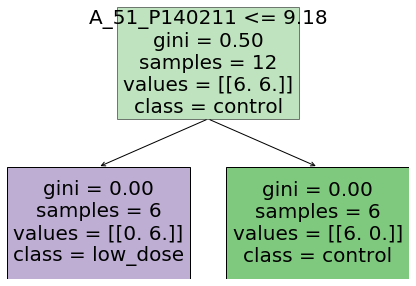

In [7]:
dtree = dtreeplt(
    model=control_vs_low_dose,
    feature_names=list(data.columns),
    target_names=['control', 'low_dose']
)
fig = dtree.view()

Так как данные для построения дерева содержат огромное количество признаков (22514) всегда находится 1 такой, по которому 12 экзмепляров можно четко разделить в соответсвии с группой, и индекс Джини становится равным нулю после первого же разделения на подгруппы.

In [10]:
control_vs_high_row_indices = [0, 1, 2, 3, 4, 5, 12, 13, 14, 15, 16, 17]
control_vs_high_dose = clf.fit(data.iloc[control_vs_high_row_indices,:], classes.iloc[control_vs_high_row_indices,:])

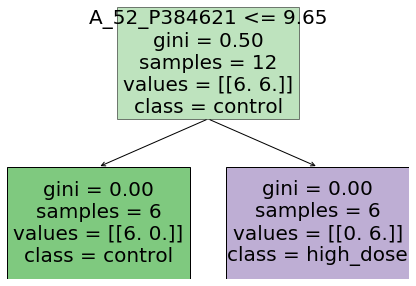

In [11]:
dtree = dtreeplt(
    model=control_vs_high_dose,
    feature_names=list(data.columns),
    target_names=['control', 'high_dose']
)
fig = dtree.view()

Воспользововшись результатами из предыдущего пункта задания можно увидеть, что полученным в корнях деревьям соответсвуют следующие гены: 
A_51_P140211 - ENSMUSG00000024038

A_52_P384621 - ENSMUSG00000007476

т.е. признаки в деревьях не совпадают.